Consist of chapter 1 and chapter 2

In [1]:
import spacy

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
text="Mary, don't slap the green witch"

In [6]:
print([str(token) for token in nlp(text.lower())])

['mary', ',', 'do', "n't", 'slap', 'the', 'green', 'witch']


In [8]:
from nltk.tokenize import TweetTokenizer
tweet=u"Snow White and the Seven Degrees #MakeAMovieCold@midnight:­)"
tokenizer=TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':', '\xad', ')']


This process of understanding the linguistics of a language and applying it to solving NLP problems
is called feature engineering. This is something that we keep to a minimum here, for convenience
and portability of models across languages. But when building and deploying real­world production
systems, feature engineering is indispensable, despite recent claims to the contrary. For an
introduction to feature engineering in general, consider reading the book by Zheng and Casari
(2016).

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Mary slapped the green witch.")
for token in doc:
  print('{} ­->{}'.format(token, token.pos_))

Mary ­->PROPN
slapped ­->VERB
the ­->DET
green ­->ADJ
witch ­->NOUN
. ­->PUNCT


In [12]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 15341729.46it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 297481.59it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5498516.58it/s] 


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24071657.74it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



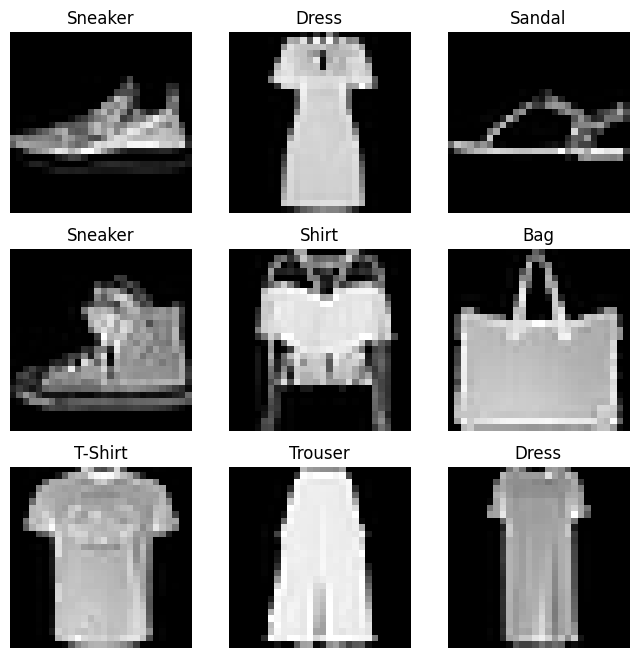

In [13]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [14]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):#returns the number of sample in our datasets
        return len(self.img_labels)

    def __getitem__(self, idx):#__getitem__ functions load and returns a sample from the datasaet at the given index idx
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [17]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(training_data, batch_size=64,shuffle=True)
test_dataloader=DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape:torch.Size([64, 1, 28, 28])
Lables batch shape:torch.Size([64])


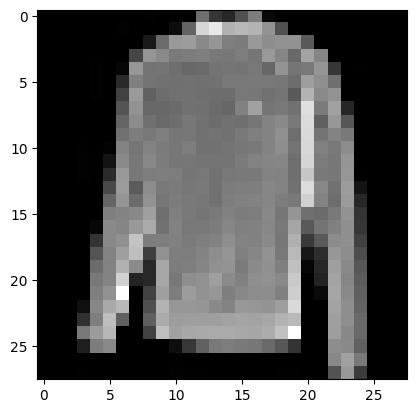

label is 2


In [19]:
train_features, train_labels=next(iter(train_dataloader))
print(f"Feature batch shape:{train_features.size()}")
print(f"Lables batch shape:{train_labels.size()}")
img=train_features[0].squeeze()
label=train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"label is {label}")

 Implementing a perceptron using PyTorch

In [22]:
import torch
import torch.nn as nn #It provides various neural network

class Perceptron(nn.Module):
  #This line defines a new Python class named Perceptron, which is a subclass of nn.Module.
  #In PyTorch, neural network models are typically implemented as subclasses of nn.Module.
  """ A perceptron is one linear layer """
  def __init__(self, input_dim):
    # This line calls the constructor of the superclass (nn.Module) to initialize the Perceptron class.
    # It's necessary to call the constructor of the superclass when defining a subclass in Python.
    """
    Args:
    input_dim (int): size of the input features
    """
    super(Perceptron, self).__init__()
    self.fc1 = nn.Linear(input_dim, 1)#In this case, the input dimension is input_dim (the size of the input features), and the output dimension is 1.
  def __forward__(self, x_in):
    return torch.sigmoid(self.fc1(x_in)).squeeze()

<ipython-input-23-5564ff827e74>:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  x=torch.range(-5.,5.,0.1)


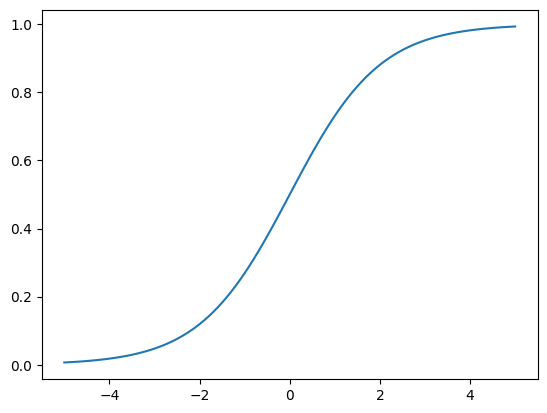

In [23]:
import torch
import matplotlib.pyplot as plt
x=torch.range(-5.,5.,0.1)
y=torch.sigmoid(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

As you can observe from the plot, the sigmoid function saturates (i.e., produces extreme valued
outputs) very quickly and for a majority of the inputs. This can become a problem because it can lead
to the gradients becoming either zero or diverging to an overflowing floating­point value. These
phenomena are also known as vanishing gradient problem and exploding gradient problem,
respectively.

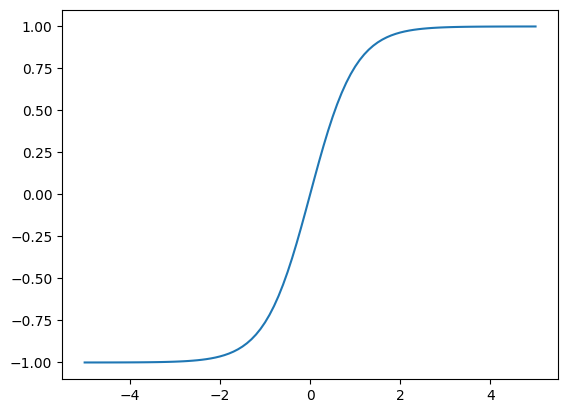

In [24]:
y=torch.tanh(x)
plt.plot(x.numpy(),y.numpy())
plt.show()

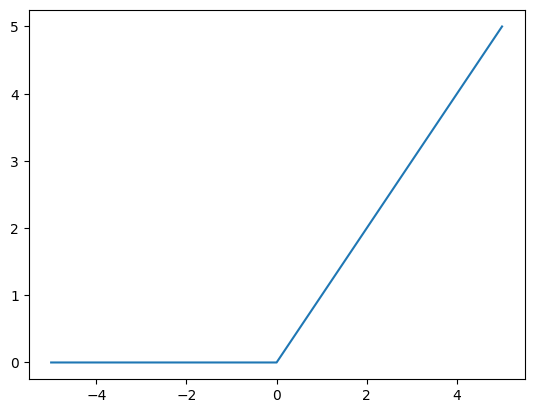

In [29]:
relu=torch.nn.ReLU()
y=relu(x)
plt.plot(x.numpy(),y.numpy())

In [33]:
import torch.nn as nn
softmax=torch.nn.Softmax(dim=1)
#setting dim=1 ensures that the softmax function is applied independently to each sample,
#producing a probability distribution over the categories for each sample.
x_input=torch.randn(1,3)
y_output=softmax(x_input)
print(torch.sum(y_output,dim=1))

tensor([1.])


In [35]:
mse_loss=torch.nn.MSELoss()
outputs=torch.randn(3,5,requires_grad=True)
target=torch.randn(3,5)
loss=mse_loss(outputs,target)
print(loss)

tensor(1.1539, grad_fn=<MseLossBackward0>)


In [36]:
ce_loss=CrossEntropyLoss()
outputs=torch.randn(3,5,requires_grad=True)
targets=torch.tensor([1,0,3])
loss=ce_loss(outputs,targets)
print(loss)

NameError: name 'CrossEntropyLoss' is not defined